In [ ]:
#import drive from goolge colab and mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt

In [ ]:
books=pd.read_excel('/content/drive/MyDrive/Overview.xlsx')

In [ ]:
books.head()

,title,overview,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,Data Analysis Using R: A Primer for Data Scien...,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23.0,0.55,0.39,0.06,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)"
1,Head First Data Analysis: A Beginner's Guide,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124.0,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)"
2,Guerrilla Data Analysis with Microsoft Excel,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10.0,0.87,0.13,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)"
3,Python for Data Analysis: Wrangling with Panda...,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,1686.0,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)"
4,Excel Data Analysis For Dummies,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12.0,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)"


In [ ]:
#too se the shape of a movie dataset
books.shape

(199, 17)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
books.isnull().sum()

title                             0
overview                          0
author                           42
price                            13
price (including used books)     13
pages                            11
avg_reviews                      24
n_reviews                        24
star5                            24
star4                            39
star3                            66
star2                            94
star1                           130
dimensions                       32
weight                           30
language                          9
publisher                        15
dtype: int64

In [ ]:
books.drop(columns=['price','price (including used books)','pages','avg_reviews','n_reviews','star5','star4','star3','star2','star1','dimensions','weight','language'], inplace=True)

In [ ]:
books.dropna(inplace=True)

In [ ]:
books.shape

(148, 4)

In [ ]:
# Assuming your DataFrame is named books and the column is named 'publisher'
#books['publisher'] = books['publisher'].str.split(';').str[0].str.strip()
books['publisher'] = books['publisher'].str.split(';').str[0].str.strip()
books['publisher'] = books['publisher'].str.replace(r'\([^)]*\)', '').str.strip()

# Display the result
print(books['publisher'])

0      Notion Press Media Pvt Ltd
2               Holy Macro! Books
3                  O'Reilly Media
4                     For Dummies
6                  O'Reilly Media
                  ...            
194       Independently published
195                         Wiley
196                    Kogan Page
197              Packt Publishing
198            Emerald Publishing
Name: publisher, Length: 148, dtype: object


<ipython-input-11-96b6a46da037>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  books['publisher'] = books['publisher'].str.replace(r'\([^)]*\)', '').str.strip()


In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

# Apply the preprocessing function to the 'overview' column
books['preprocessed_overview'] = books['overview'].apply(preprocess_text)

# Print the first few rows of the preprocessed DataFrame
print(books[['title', 'overview', 'preprocessed_overview']].head())

                                               title  \
0  Data Analysis Using R: A Primer for Data Scien...   
2       Guerrilla Data Analysis with Microsoft Excel   
3  Python for Data Analysis: Wrangling with Panda...   
4                    Excel Data Analysis For Dummies   
6         SQL for Data Analysis: Advanced Techniques   

                                            overview  \
0  Data Analysis Using R (Low Priced Edition): A ...   
2  Guerrilla Data Analysis Using Microsoft Excel:...   
3  Python for Data Analysis: Data Wrangling with ...   
4  Excel Data Analysis For Dummies (For Dummies (...   
6  SQL for Data Analysis: Advanced Techniques for...   

                               preprocessed_overview  
0  data analysis using r low priced edition prime...  
2  guerrilla data analysis using microsoft excel ...  
3  python data analysis data wrangling pandas num...  
4  excel data analysis dummies dummies computer tech  
6  sql data analysis advanced techniques transfor..

In [ ]:
books.head()

,title,overview,author,publisher,preprocessed_overview
0,Data Analysis Using R: A Primer for Data Scien...,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],Notion Press Media Pvt Ltd,data analysis using r low priced edition prime...
2,Guerrilla Data Analysis with Microsoft Excel,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",Holy Macro! Books,guerrilla data analysis using microsoft excel ...
3,Python for Data Analysis: Wrangling with Panda...,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],O'Reilly Media,python data analysis data wrangling pandas num...
4,Excel Data Analysis For Dummies,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],For Dummies,excel data analysis dummies dummies computer tech
6,SQL for Data Analysis: Advanced Techniques,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],O'Reilly Media,sql data analysis advanced techniques transfor...


In [ ]:
# Assuming your output file is named 'output.csv'
output_file = 'preprocessoutput.csv'

# Save the DataFrame to a CSV file
books.to_csv(output_file, index=False)

# Display a message
print(f'The updated DataFrame has been saved to {output_file}')

The updated DataFrame has been saved to preprocessoutput.csv


In [ ]:
#to see the overview of books
books['preprocessed_overview']

0      data analysis using r low priced edition prime...
2      guerrilla data analysis using microsoft excel ...
3      python data analysis data wrangling pandas num...
4      excel data analysis dummies dummies computer tech
6      sql data analysis advanced techniques transfor...
                             ...                        
194    python programming books complete beginner gui...
195                            categorical data analysis
196    data driven hr use analytics metrics drive per...
197    pandas workshop comprehensive guide using pyth...
198    statistical methods categorical data analysis ...
Name: preprocessed_overview, Length: 148, dtype: object

In [ ]:
#to get the tf-idf vectorizer for overview
tfidf = TfidfVectorizer(stop_words="english")
books['preprocessed_overview'] = books['preprocessed_overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(books['preprocessed_overview'])

In [ ]:
#check the similarity between two overview's vectorizers
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
#get book series and drop duplicates
indices=pd. Series(books.index,index=books['title']).drop_duplicates()
indices

title
Data Analysis Using R: A Primer for Data Scientist             0
Guerrilla Data Analysis with Microsoft Excel                   2
Python for Data Analysis: Wrangling with Pandas and NumPy      3
Excel Data Analysis For Dummies                                4
SQL for Data Analysis: Advanced Techniques                     6
                                                            ... 
Business Analysis For Dummies                                194
Machine Learning Explained The Simple Way                    195
CompTIA Data+ Study Guide: Exam DA0-001                      196
RNA Sequencing: Principles and Data Analysis                 197
Analysis of Panel Data (Econometric Society Monographs)      198
Length: 148, dtype: int64

In [ ]:
indices['Data Analysis Using R: A Primer for Data Scientist']

0

In [ ]:
#to get the recommendation list for given book
def get_recommendations(title,cosine_sim = cosine_sim):
  idx = indices[title]
  sim_scores=enumerate(cosine_sim[idx])
  sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores = sim_scores[1:11]
  sim_index=[i[0] for i in sim_scores]
  print(books["title"].iloc[sim_index])

In [ ]:
get_recommendations('Data Analysis Using R: A Primer for Data Scientist')

86                                          Data for All
110                Python Data Analysis - Second Edition
161    Introduction to Mediation, Moderation, and Con...
198    Analysis of Panel Data (Econometric Society Mo...
9        R in Action: Data Analysis with R and Tidyverse
125            The Workflow of Data Analysis Using Stata
96             Hands-On Exploratory Data Analysis with R
148       Practical Data Analysis Using Jupyter Notebook
58                    Hands-On Data Analysis with Pandas
89     Statistical Analysis of fMRI Data, second edition
Name: title, dtype: object


In [ ]:
get_recommendations('Guerrilla Data Analysis with Microsoft Excel')

58                    Hands-On Data Analysis with Pandas
56     Data Analysis with Python: Introducing Essenti...
86                                          Data for All
197         RNA Sequencing: Principles and Data Analysis
146    Python for ArcGIS Pro: Automate cartography an...
110                Python Data Analysis - Second Edition
114    Become a Python Data Analyst: Perform explorat...
36        Python for Data Science: Hands-On Introduction
132                            Exploratory Data Analysis
195            Machine Learning Explained The Simple Way
Name: title, dtype: object


In [ ]:
# Define ground truth data (for example purposes)
ground_truth = {
    'The Dark Knight Rises': [
        'Batman Forever',
        'Batman Returns',
        'Batman',
        'Batman: The Dark Knight Returns, Part 2',
        'Batman Begins',
        'Slow Burn',
        'Batman v Superman: Dawn of Justice',
        'JFK',
        'Batman & Robin'],
    'The Matrix': ['Hackers', 'Commando', 'Pulse','Obitaemyy Ostrov','Transcendence','Avatar','Live Free or Die Hard','Supernova','The Matrix Reloaded','The Love Letter']
}

In [ ]:
ground_truth = {'Python Data Analysis - Second Edition':[
 'Data for All',
'Think Python: How to Think Like a Computer Sci...',
'R in Action: Data Analysis with R and Tidyverse',
'The Workflow of Data Analysis Using Stata',
'Analysis of Panel Data (Econometric Society Mo...',
'Introduction to Mediation, Moderation, and Con...',
'Hands-On Exploratory Data Analysis with R',
'Practical Data Analysis Using Jupyter Notebook',
 'Hands-On Data Analysis with Pandas'],

  'Guerrilla Data Analysis with Microsoft Excel':['Introduction to Mediation, Moderation, and Con...',
                   'EXCEL DATA ANALYSIS: Ultimate Practical Guide ...','Excel 2022: The most updated guide to master M...',
'Excel 2022: Learn From Scratch with the Most U...',
' Excel Pivot Tables: Basic Beginners Guide',
'Data for All',
'Excel Data Analysis: Your visual blueprint for...',
'Excel Data Analysis For Dummies',
'Recovering Black Storytelling in Qualitative R...',
'Microsoft 365 Excel: The Only App That Matters']

}

In [ ]:
#define a function to calculate precision and recall
def calculate_precision_recall(ground_truth, recommended_movies):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for title in ground_truth:
        if title in recommended_movies:
            true_positives += len(set(ground_truth[title]) & set(recommended_movies[title]))
            false_positives += len(set(recommended_movies[title]) - set(ground_truth[title]))
            false_negatives += len(set(ground_truth[title]) - set(recommended_movies[title]))

    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0

    return precision, recall

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = enumerate(cosine_sim[idx])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    sim_index = [i[0] for i in sim_scores]
    return list(books["title"].iloc[sim_index])

# Get recommendations
recommended_books = {
    'Python Data Analysis - Second Edition': get_recommendations('Python Data Analysis - Second Edition'),
    'Guerrilla Data Analysis with Microsoft Excel': get_recommendations('Guerrilla Data Analysis with Microsoft Excel')
}

Precision: 0.1
Recall: 0.10526315789473684
Accuracy: 0.10263157894736842


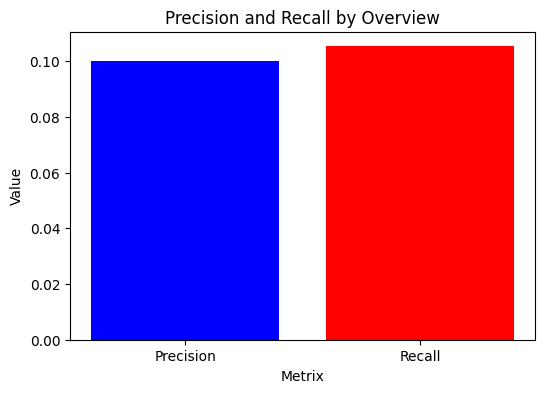

In [ ]:
# Calculate precision and recall
precision, recall = calculate_precision_recall(ground_truth, recommended_books)

# Calculate accuracy (for example purposes)
accuracy = (precision + recall) / 2

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')

#calculated precision and recall values
prec = precision
rec = recall

#Bar chart of the precision and recall
categories = ['Precision', 'Recall']
values = [prec, rec]

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Metrix')
plt.ylabel('Value')
plt.title('Precision and Recall by Overview')
plt.show()